有些时候，可能模型泛化能力不足，出现过拟合却不知道的情况
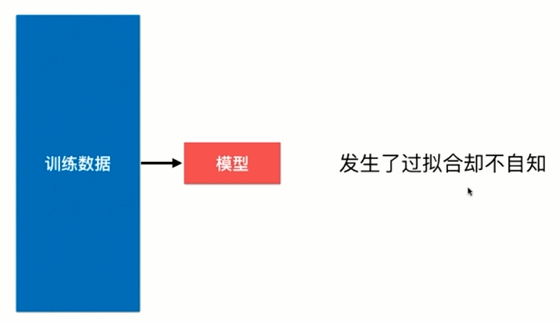

因此，需要把数据分成测试数据集和训练数据集
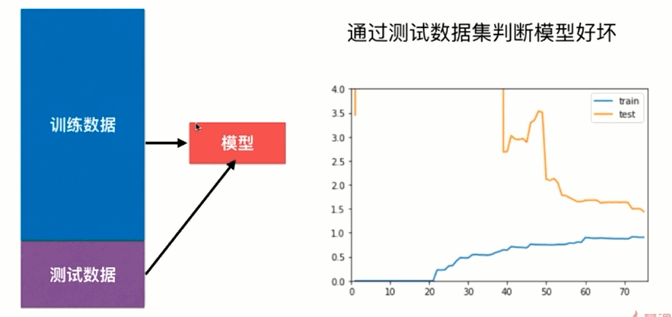

问题：针对特定测试数据集过拟合，怎么办？
需要对数据分成三部分

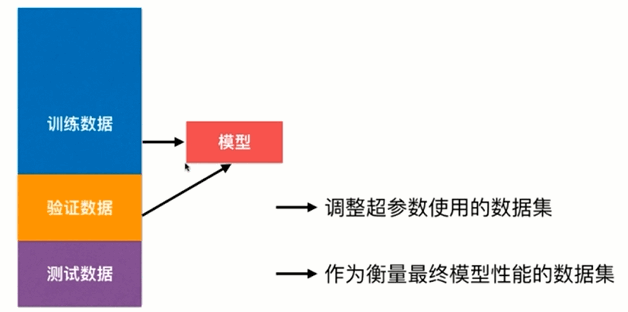

因为验证数据集是随机选取的，但有些时候还是会出现过拟合的现象，这就需要对数据进行交叉验证处理

### 交叉验证

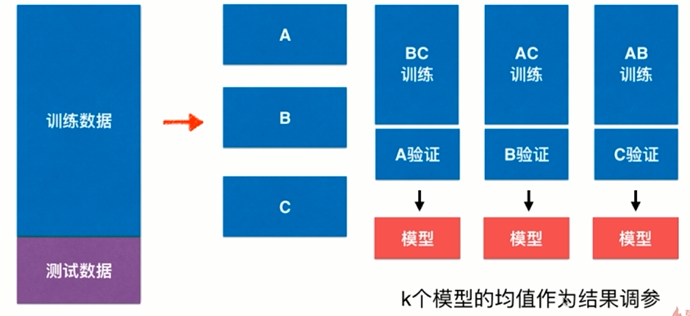

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

### 测试train_test_split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
best_score, best_p, best_k = 0, 0, 0
### 这三个，用来存储最佳的参数

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        
        if score > best_score:
            # 对调优后的数据进行存储
            best_score, best_p, best_k = score, p, k
       

In [6]:
print("Best K = ", best_k)
print("Best P = ", best_p)
print("Best Score = ", best_score)

Best K =  4
Best P =  1
Best Score =  0.9866666666666667


### 使用交叉验证的方式进行模型的训练

In [7]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.97566372, 0.98669623, 0.97522523])

使用交叉验证的方式进行参数的调整

In [8]:
best_score, best_p, best_k = 0, 0, 0
### 这三个，用来存储最佳的参数

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        
        if score > best_score:
            # 对调优后的数据进行存储
            best_score, best_p, best_k = score, p, k

In [10]:
print("Best K = ", best_k)
print("Best P = ", best_p)
print("Best Score = ", best_score)

Best K =  2
Best P =  4
Best Score =  0.9866344917607598


这里的score不是所要求的score,目的是拿到这里的参数k和p而已

In [12]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

In [13]:
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.98

### 回顾网格搜索

In [14]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = [
    {
        "weights":['distance'],
        'n_neighbors':[i for i in range(2, 11)],
        'p':[i for i in range(1, 6)]
    }
]

In [19]:
grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  3.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

对45组参数进行网格搜索，网格交叉验证，分成3分，需要135次训练

In [20]:
grid_search.best_score_

0.9866369710467706

In [21]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 4, 'weights': 'distance'}

In [22]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.9822222222222222

训练5个模型，分贝得出分数

In [23]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.98534799, 0.97426471, 0.98148148, 0.98876404, 0.98490566])

In [24]:
GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### 总结

k-folds交叉验证

把训练数据集分成k份，称为k-folds cross validation

缺点，每次训练k个模型，相当于整体性慢了k倍

#### 留一法LOO-CV

把训练数据集分成m份，称为留一法，Leave-One-Out Cross VAlidation

完全不受随机的影响，最接近模型的真正的性能指标

缺点：计算量巨大